In [1]:
#!pip install imblearn
#!pip install --user imblearn

#for DataFrames,Analysing,cleaning and manipulating datasets
import pandas as pd 

#for multidimensional arrays
import numpy as np

#for visualizing
import matplotlib.pyplot as plt

#advance visualization tool
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

## Import data

In [2]:
df=pd.read_csv("diabetes.csv")

#Dimensions of dataset
df.shape

(768, 9)

In [3]:
#Retrieve the topmost rows
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


1. **Pregnancies**: No. of times pregnant.
2. **Glucose**: Plasma Glucose Concentration(mg/dl).
3. **Blood Pressure**: Diastolic Blood Pressure(mmHg).
4. **Skin Thickness**:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness       leads to obesity and chances of diabetes increases.
5. **Insulin**: 2-Hour Serum Insulin (mu U/ml).
6. **BMI**: Body Mass Index (weight in kg/ height in m2).
7. **Diabetes Pedigree Function**: It provides information about diabetes history in relatives and genetic relationship of those      relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.
8. **Age**:Age(years).
9. **Outcome**: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having    diabetes.

In [4]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


## Visualization of Target Variable

array([<AxesSubplot:ylabel='Outcome'>], dtype=object)

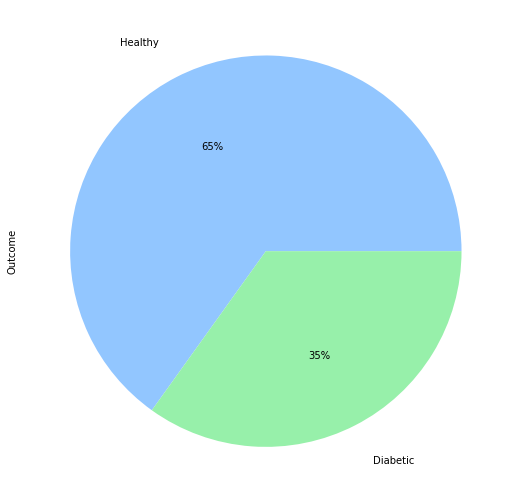

In [5]:
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
df['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))
# sns.countplot(df['Outcome'],label="Count")

Samples of healthy people:  500
Samples of diabetic people:  268


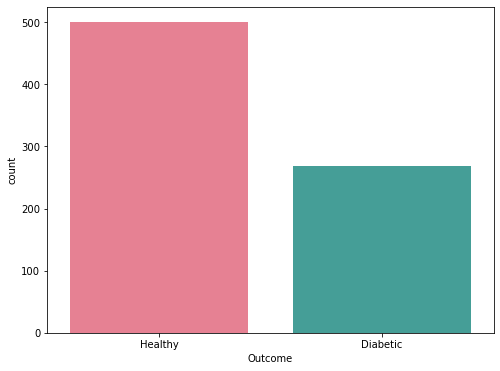

In [6]:
from matplotlib.pyplot import figure, show

figure(figsize=(8,6))
ax = sns.countplot(x=df['Outcome'], data=df,palette="husl")
ax.set_xticklabels(["Healthy","Diabetic"])
healthy, diabetics = df['Outcome'].value_counts().values

print("Samples of healthy people: ", healthy)
print("Samples of diabetic people: ", diabetics)

### It's clear that classes are imbalanced so we have to balance them.

In [7]:
# # Separate majority and minority classes
# from sklearn.utils import resample
# df_majority = df[df.Outcome==0]
# df_minority = df[df.Outcome==1]

# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=500,    # to match majority class
#                                  random_state=123) # reproducible results

# # Combine majority class with upsampled minority class
# df_up = pd.concat([df_majority, df_minority_upsampled])

# # Display new class counts
# df_up.Outcome.value_counts()

In [8]:
# # import SMOTE module from imblearn library
# # pip install imblearn (if you don't have imblearn in your system)
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# X, Y = sm.fit_sample(X, Y.ravel())

## Data Preprocessing

In [9]:
#Information about columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


#### Above analysis shows that All our attributes are NUMERICAL valued(as the data type is int and float) and there are NO NULL values.

In [10]:
#Dupliacte Values
df.duplicated().sum()

0

In [11]:
#statistical summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### It is clear from the "count" column that there are **no NULL** and **Empty** Values.
#### As features like Insulin, BMI, BloodPressure, Glucose and SkinThickness cannot have "minimum" value of 0, meaning that there are Zero values in our dataset which are to be handled.

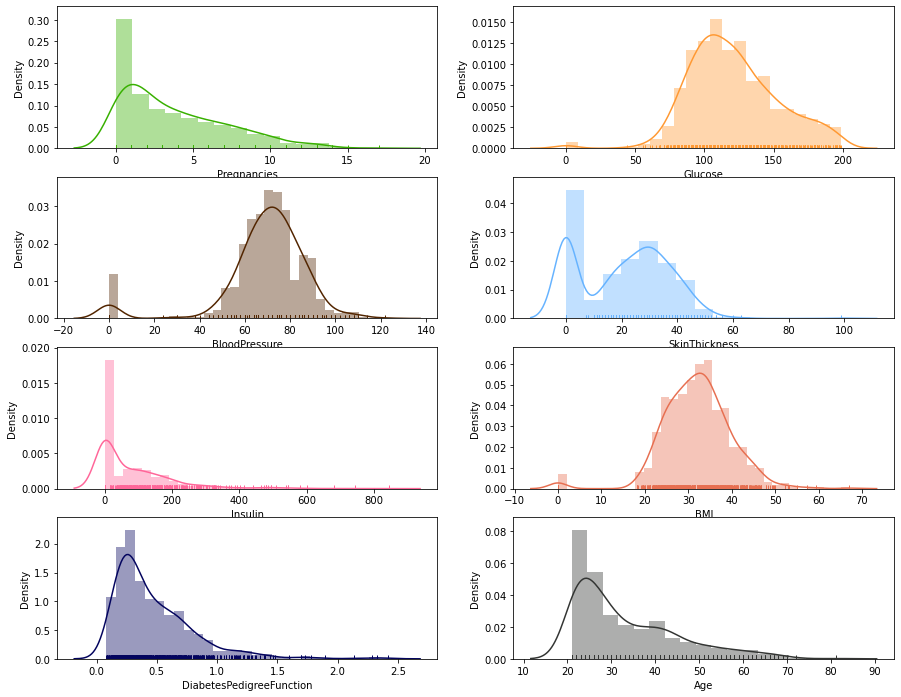

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(df['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

#### It is clear from the above graphs that Pregnancies, Insulin, DiabetesPedigreeFunction and Age are Right Skewed and Also have quite huge number of Zero valued columns in Insulin and SkinThickness.

In [13]:
#Count of columns with value O
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  5
Count of zeros in column  BloodPressure  is :  35
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  11
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


#### Since the database consists of women of atleast 21 years so it is unlikely that everyone would have been pregnant so ignoring the zero values in pregnancies column.
#### As the Insulin and SkinThickness values with zero are pretty high and removing them would lead huge data loss so it is better to replace them with a value.
#### As blood pressure & glucose are critical for determing diabeties it should not be invalid  and also since their zero values are very small so it is better to remove them.

### Replacing Zeroes with median value

In [14]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())

df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

df = df[(df['BloodPressure'] != 0) & (df['BMI'] != 0) & (df['Glucose'] != 0)]

In [15]:
#Columns with value O
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  99
Count of zeros in column  Glucose  is :  0
Count of zeros in column  BloodPressure  is :  0
Count of zeros in column  SkinThickness  is :  0
Count of zeros in column  Insulin  is :  0
Count of zeros in column  BMI  is :  0
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  475


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,27.542818,9.423322,7.000,23.000,24.000,33.0000,99.00
Insulin,724.0,98.480663,107.505204,14.000,30.500,48.000,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


### Min values are sorted out.
### If we observe the max values of Insulin, BMI, SkinThickness,etc  values are impossible to have indicating that they are ought to be outliers.
## Outlier Detection:

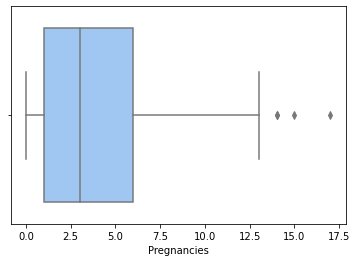

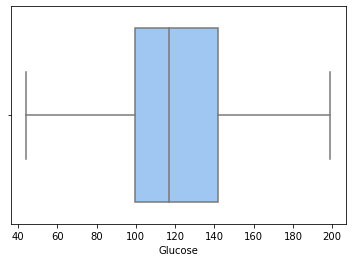

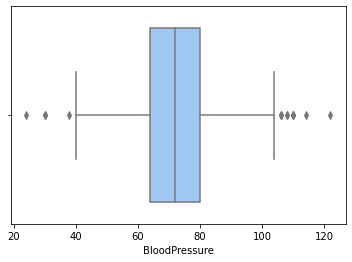

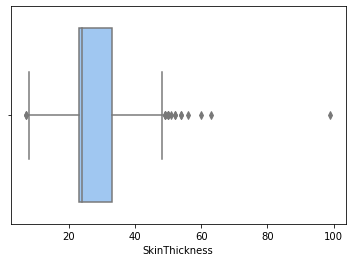

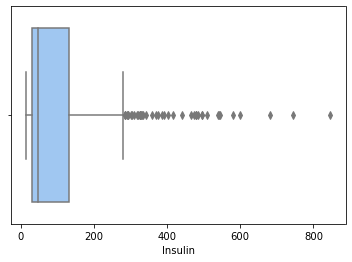

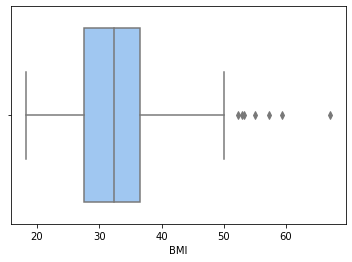

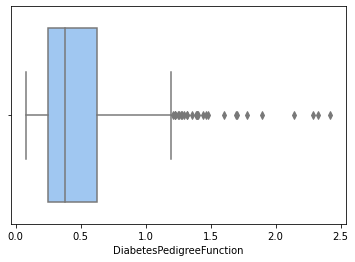

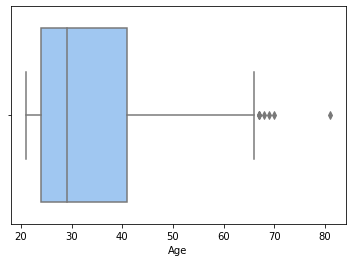

In [17]:
# use box plot for features till DiabetesPedigreeFunction
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

for feature in features:
    sns.boxplot(x=feature, data=df)
    plt.show()

### Z- Score:

In [18]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.63502182 0.84993279 0.03237751 ... 0.45842062 1.41607523 1.38116998]
 [0.85286102 1.20026207 0.51737031 ... 0.37269083 0.19994691 0.72402384]
 [1.23017496 1.98892994 0.67903458 ... 0.59392792 0.11489311 1.38116998]
 ...
 [0.33744525 0.02872215 0.03237751 ... 0.69188581 0.28500071 0.72402384]
 [0.85286102 0.13399173 1.00236311 ... 0.37871338 1.16091384 1.38116998]
 [0.85286102 0.93991986 0.19404178 ... 0.48109667 0.88037728 0.72402384]]


In [19]:
threshold = 2
print(np.where(z > 2))

(array([  4,   4,   7,   7,  10,  10,  11,  11,  11,  13,  15,  19,  21,
        25,  25,  27,  33,  36,  36,  40,  42,  49,  50,  52,  53,  53,
        54,  57,  67,  73,  76,  76,  78,  78,  80,  84,  85,  91,  91,
        92,  98, 103, 107, 112, 112, 115, 117, 117, 121, 131, 137, 138,
       139, 141, 143, 144, 145, 145, 146, 150, 167, 167, 174, 175, 175,
       176, 176, 187, 194, 194, 195, 197, 199, 200, 203, 206, 208, 209,
       210, 215, 215, 215, 218, 226, 230, 232, 232, 234, 234, 235, 241,
       241, 245, 245, 246, 246, 247, 249, 257, 258, 259, 262, 270, 276,
       278, 280, 282, 283, 286, 286, 291, 302, 302, 306, 313, 315, 317,
       324, 326, 335, 336, 337, 337, 338, 339, 339, 340, 346, 347, 347,
       347, 351, 351, 351, 354, 355, 358, 359, 363, 364, 368, 371, 375,
       384, 384, 385, 385, 391, 394, 401, 408, 409, 411, 413, 413, 418,
       418, 418, 427, 428, 430, 431, 436, 446, 450, 451, 456, 457, 457,
       457, 459, 459, 463, 464, 467, 477, 478, 480, 486, 487, 4

In [20]:
print(z[4][2])

2.6190057667897855


In [21]:
df = df[(z < 2).all(axis=1)]

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,519.0,3.362235,2.803025,0.000,1.0000,3.000,5.0000,10.000
Glucose,519.0,115.766859,25.699285,61.000,97.0000,112.000,129.5000,183.000
BloodPressure,519.0,71.005780,10.433924,48.000,64.0000,70.000,78.0000,96.000
SkinThickness,519.0,26.269750,7.917313,10.000,23.0000,23.000,31.0000,46.000
Insulin,519.0,77.371869,62.749144,15.000,30.5000,40.000,114.5000,310.000
BMI,519.0,31.590173,5.991252,19.100,27.2000,31.600,35.4000,46.100
DiabetesPedigreeFunction,519.0,0.413545,0.230948,0.078,0.2375,0.349,0.5595,1.136
Age,519.0,30.410405,8.948327,21.000,23.0000,27.000,37.0000,56.000
Outcome,519.0,0.279383,0.449129,0.000,0.0000,0.000,1.0000,1.000


### Even after Z-score corrections, we seem to have outliers so performing IQR score method to remove them.

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  4.000
Glucose                     32.500
BloodPressure               14.000
SkinThickness                8.000
Insulin                     84.000
BMI                          8.200
DiabetesPedigreeFunction     0.322
Age                         14.000
Outcome                      1.000
dtype: float64


In [24]:
#print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

In [25]:
#To filter out the outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(475, 9)

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,475.0,3.402105,2.759027,0.000,1.000,3.00,5.000,10.000
Glucose,475.0,114.065263,24.410820,61.000,96.000,111.00,128.000,178.000
BloodPressure,475.0,70.997895,10.207654,48.000,64.000,70.00,78.000,96.000
SkinThickness,475.0,25.766316,7.195442,11.000,23.000,23.00,30.000,43.000
Insulin,475.0,71.477895,55.087886,15.000,30.500,30.50,105.000,235.000
BMI,475.0,31.277053,5.889832,19.100,26.850,31.20,35.000,46.100
DiabetesPedigreeFunction,475.0,0.399747,0.218149,0.078,0.235,0.34,0.542,0.997
Age,475.0,30.562105,9.049666,21.000,23.000,28.00,37.000,56.000
Outcome,475.0,0.263158,0.440812,0.000,0.000,0.00,1.000,1.000


In [27]:
#Correlation statistics
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.186460,0.176818,0.083170,-0.109723,0.033272,-0.001766,0.603098,0.258007
Glucose,0.186460,1.000000,0.204573,0.087840,0.230086,0.118363,0.045364,0.253178,0.436200
BloodPressure,0.176818,0.204573,1.000000,0.063788,-0.070540,0.222443,-0.003269,0.321781,0.094833
SkinThickness,0.083170,0.087840,0.063788,1.000000,0.206613,0.505083,0.073626,0.074887,0.119200
Insulin,-0.109723,0.230086,-0.070540,0.206613,1.000000,0.146924,0.220852,-0.081828,0.044592
BMI,0.033272,0.118363,0.222443,0.505083,0.146924,1.000000,0.142853,0.090412,0.225709
DiabetesPedigreeFunction,-0.001766,0.045364,-0.003269,0.073626,0.220852,0.142853,1.000000,0.005206,0.139325
Age,0.603098,0.253178,0.321781,0.074887,-0.081828,0.090412,0.005206,1.000000,0.306596
Outcome,0.258007,0.436200,0.094833,0.119200,0.044592,0.225709,0.139325,0.306596,1.000000


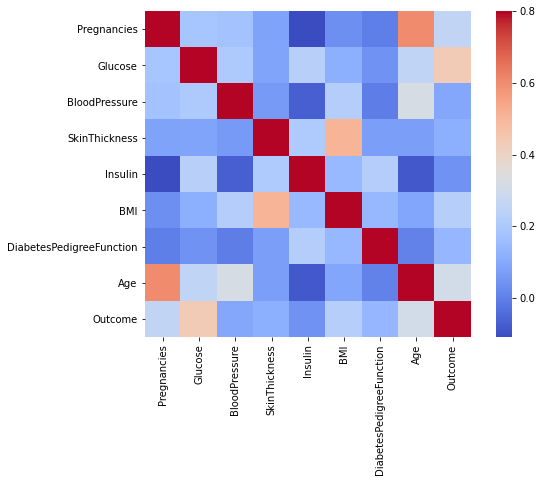

In [28]:
#Visulaizing Correlations
matrix= df.corr()
ax= plt.subplots(figsize=(9,6)), sns.heatmap(matrix, vmax= .8, square= True, cmap= "coolwarm")

#### We can see that final Outcome is not correlated with most of the features except the Glucose(which has a correlation of 0.4).
#### Also, No two features are correlated with each other except Age with Pregnancies and BMI with Skinthickness. So, Most of the features are independent of each other.

### Feature Selection

In [29]:
X = df.drop(columns='Outcome')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
3,1,89,66,23,94.0,28.1,0.167,21
5,5,116,74,23,30.5,25.6,0.201,30
6,3,78,50,32,88.0,31.0,0.248,26


In [30]:
Y = df['Outcome']
Y.head()

0    1
1    0
3    0
5    0
6    1
Name: Outcome, dtype: int64

### Data split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)

In [32]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)

X_train: (380, 8)
X_test: (95, 8)
Y_train: (380,)
Y_test: (95,)


## Balancing Classes

In [33]:
df['Outcome'].value_counts()

0    350
1    125
Name: Outcome, dtype: int64

#### Implementing OverSampling in order to make minority class equal to majority class created duplicates and also overfitted in our case.
#### ALso, Working with DownSampling left with a very small dataset than it is which underfits the model.
#### So, Using SMOTE(Synthetic Minority Oversampling Technique), since it retains and doesn't dupliacte as well.

In [34]:
from imblearn.over_sampling import SMOTE

# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

print("Before UpSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(Y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

Before UpSampling, counts of label '1': 102
Before UpSampling, counts of label '0': 278 

After UpSampling, counts of label '1': 278
After UpSampling, counts of label '0': 278 

After UpSampling, the shape of train_X: (556, 8)
After UpSampling, the shape of train_y: (556,) 



## Feature Scaling

##### Technique to standardize the independent features present in the data in a fixed range. 
##### It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

### Standard Scaler: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

## In our case for example the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason we need to apply a proper transformation.

In [35]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

## Logistic Regression

In [36]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = { 'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
         'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
         'C' : loguniform(1e-5, 100)   
        }

logreg = LogisticRegression()
# define search
search = RandomizedSearchCV(logreg, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, Y_train_res)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7494805194805195
Best Hyperparameters: {'C': 0.04529038089384993, 'penalty': 'l1', 'solver': 'liblinear'}


In [37]:
# clf.best_score_

In [38]:
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev

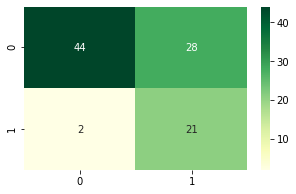

In [39]:
lr = LogisticRegression(C= 0.04529038089384993, penalty= 'l1', solver= 'liblinear')
lr.fit(X_train, Y_train_res)
y_pred = lr.predict(X_test)

#Creating confusion matrix
ConfusionMatrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(5,3))
sns.heatmap(ConfusionMatrix, annot=True,cmap="YlGn",fmt='g')
plt.show()
# lr.fit(X_train, Y_train_res)

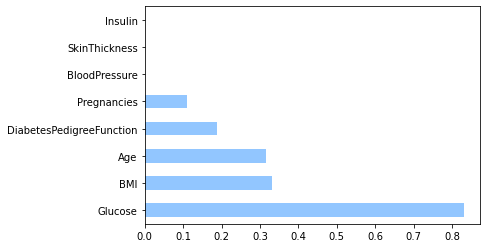

In [40]:
importance = lr.coef_[0]

#plot graph of feature importances for better visualization
feat_importances = pd.Series(importance, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


# #importance is a list so you can plot it. 
# feat_importances = pd.Series(importance, index = features)
# feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [41]:
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
FP= ConfusionMatrix[0,1] #False positive
FN= ConfusionMatrix[1,0] #False negative

precision = TN/(TN+FN)
recall = TN/(TN+FP)
f1_score = 2*precision*recall/(precision + recall)
Total=len(Y_test)

print("Accuracy from confusion matrix is ", (TN+TP)/Total)
print("Precision of Logistic Regression: ",precision)
print("Recall of Logistic Regression: ",recall)
print("F1_score of Logistic Regression: ",f1_score)

Accuracy from confusion matrix is  0.6842105263157895
Precision of Logistic Regression:  0.9565217391304348
Recall of Logistic Regression:  0.6111111111111112
F1_score of Logistic Regression:  0.7457627118644068


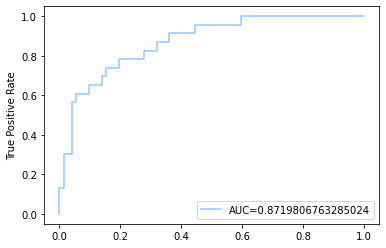

In [42]:
model_acc = []
model_skf = []
# models = [lr, model, dtree, rf, knn, gb, xgb_clf, nvb]


#define metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
model_acc.append(auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [43]:
skf = StratifiedKFold(n_splits=10, random_state=None) 
# skf.get_n_split(X,Y)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, Y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index] 
    lr.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(lr.score(X_test_fold, y_test_fold))

print('Overall Accuracy:',mean(lst_accu_stratified))
model_skf.append(mean(lst_accu_stratified))

# k_folds = KFold(n_splits = 10)

# scores = cross_val_score(lr, X, Y, cv = k_folds)

# print("Average CV Score: ", scores.mean())

Overall Accuracy: 0.7727836879432624


## Support Vector Machine

In [44]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import svm
# from sklearn.svm import SVC

 
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=cv)
 
# # fitting the model for grid search
# grid.fit(X_train, Y_train_res)

# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [45]:
# # print best parameter after tuning
# print(grid.best_params_)
 
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [46]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report


# SVM Kernels
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    SVM = svm.SVC(kernel=k)
    SVM.fit(X_train, Y_train_res)
    y_pred = SVM.predict(X_train)
    print(k)
    print(accuracy_score(Y_train_res, y_pred))

linear
0.7643884892086331
poly
0.8507194244604317
rbf
0.8884892086330936
sigmoid
0.6960431654676259


In [47]:
# Using the best model
SVM = svm.SVC(kernel= 'rbf',probability=True)
SVM.fit(X_train, Y_train_res)

y_pred = SVM.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, y_pred))

Accuracy Score: 0.7473684210526316


In [48]:
# Compute precision, recall and f1 score
from sklearn.metrics import recall_score, precision_score, f1_score
    
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
    
print("Precision is", precision)
print("Recall is", recall)
print("F1 score is", f1)

Precision is 0.4878048780487805
Recall is 0.8695652173913043
F1 score is 0.625


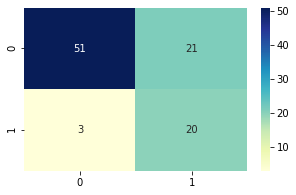

In [49]:
y_pred = SVM.predict(X_test)

#Creating confusion matrix
ConfusionMatrix = confusion_matrix(Y_test, y_pred)
#print(ConfusionMatrix)

plt.figure(figsize=(5,3))
sns.heatmap(ConfusionMatrix, annot=True,cmap="YlGnBu",fmt='g')
plt.show()

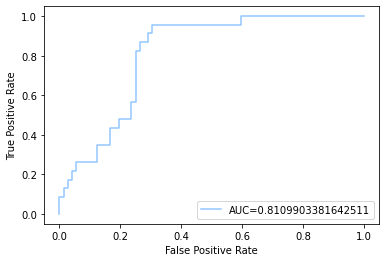

In [50]:
#define metrics
y_pred_proba = SVM.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
model_acc.append(auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [51]:
skf = StratifiedKFold(n_splits=5, random_state=None) 
# skf.get_n_split(X,Y)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, Y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index] 
    SVM.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(SVM.score(X_test_fold, y_test_fold))

print('Overall Accuracy:',mean(lst_accu_stratified))
model_skf.append(mean(lst_accu_stratified))

# k_folds = KFold(n_splits = 10)

# scores = cross_val_score(lr, X, Y, cv = k_folds)

# print("Average CV Score: ", scores.mean())

Overall Accuracy: 0.7810526315789473


## Decision Tree

In [52]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
			"max_features": randint(1, 9),
			"min_samples_leaf": randint(1, 9),
			"criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier(random_state=0)

# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(X_train, Y_train_res)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4}
Best score is 0.7787966537966539


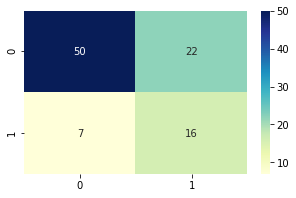

In [53]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

features= ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target=['Outcome']
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth= None, max_features= 6, min_samples_leaf= 4,random_state=0)
dtree = dtree.fit(X_train, Y_train_res)
y_pred = dtree.predict(X_test)

ConfusionMatrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(ConfusionMatrix, annot=True,cmap="YlGnBu",fmt='g')
plt.show()

In [54]:
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Precision is", precision)
print("Recall is", recall)
print("F1 score is", f1)

Accuracy Score: 0.6947368421052632
Precision is 0.42105263157894735
Recall is 0.6956521739130435
F1 score is 0.5245901639344263


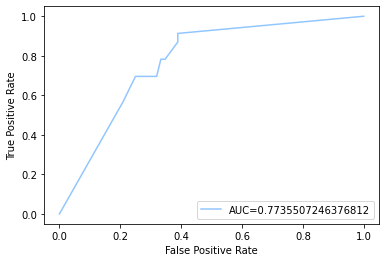

In [55]:
#define metrics
y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
model_acc.append(auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

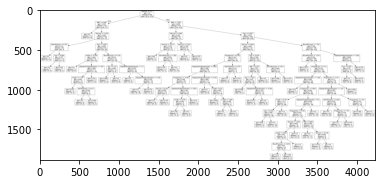

In [56]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [57]:
skf = StratifiedKFold(n_splits=10, random_state=None) 
# skf.get_n_split(X,Y)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, Y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index] 
    dtree.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(dtree.score(X_test_fold, y_test_fold))

print('Overall Accuracy:',mean(lst_accu_stratified))
model_skf.append(mean(lst_accu_stratified))
# k_folds = KFold(n_splits = 10)

# scores = cross_val_score(lr, X, Y, cv = k_folds)

# print("Average CV Score: ", scores.mean())

Overall Accuracy: 0.730718085106383


## Randomized Decision Tree

In [58]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# RFReg = RandomForestRegressor() 

# param_grid = { 
#     'max_features' : ["auto", "sqrt", "log2"],
#     'min_samples_split' : np.linspace(0.1, 1.0, 10),
#      'max_depth' : [x for x in range(1,20)]
#      }



# CV_rfc = RandomizedSearchCV(RFReg, param_grid, cv= 10,n_estimators = 500, random_state = 1, n_jobs = -1)
# CV_rfc.fit(X_train, Y_train_res)

# print("Params: ",CV_rfc.best_params_)
# #{'min_samples_split': 0.1, 'max_features': 'auto', 'max_depth': 18}
# print("Score: ",CV_rfc.best_score_)

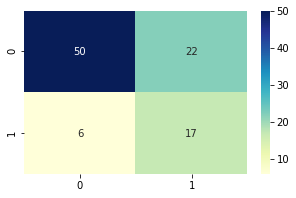

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy')
rf = rf.fit(X_train, Y_train_res)
y_pred = rf.predict(X_test)

ConfusionMatrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(ConfusionMatrix, annot=True,cmap="YlGnBu",fmt='g')
plt.show()

<AxesSubplot:title={'center':'Feature Importance'}>

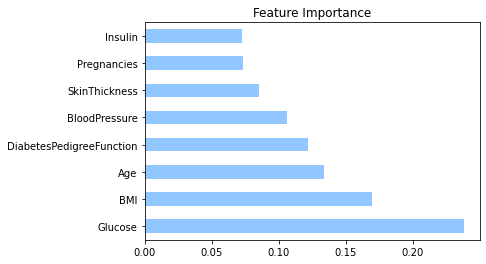

In [60]:
# from sklearn.feature_selection import SelectFromModel
# import matplotlib

# clf = RandomForestClassifier()
# clf = clf.fit(X_train,y_train)
# clf.feature_importances_  
# model = SelectFromModel(clf, prefit=True)
# test_X_new = model.transform(X_test)

# matplotlib.rc('figure', figsize=[5,5])
# plt.style.use('ggplot')

feat_importances = pd.Series(rf.feature_importances_, index=features)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [61]:
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Precision is", precision)
print("Recall is", recall)
print("F1 score is", f1)

Accuracy Score: 0.7052631578947368
Precision is 0.4358974358974359
Recall is 0.7391304347826086
F1 score is 0.5483870967741935


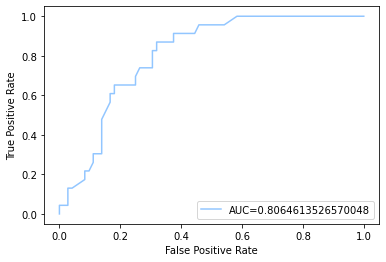

In [62]:
#define metrics
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
model_acc.append(auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [63]:
skf = StratifiedKFold(n_splits=5, random_state=None) 
# skf.get_n_split(X,Y)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, Y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index] 
    rf.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(rf.score(X_test_fold, y_test_fold))

print('Overall Accuracy:',mean(lst_accu_stratified))
model_skf.append(mean(lst_accu_stratified))

# k_folds = KFold(n_splits = 10)

# scores = cross_val_score(lr, X, Y, cv = k_folds)

# print("Average CV Score: ", scores.mean())

Overall Accuracy: 0.783157894736842


## K-Nearest Neighbor

In [64]:
# from sklearn.neighbors import KNeighborsClassifier
# training_accuracy = []
# test_accuracy = []

# # try n_neighbors from 1 to 10
# neighbors_settings = range(1, 11)
# for n_neighbors in neighbors_settings:
#     # build the model
#     knn = KNeighborsClassifier(n_neighbors=n_neighbors)
#     knn.fit(X_train, Y_train_res)
#     # record training set accuracy
#     training_accuracy.append(knn.score(X_train, Y_train_res))
#     # record test set accuracy
#     test_accuracy.append(knn.score(X_test, Y_test))
    
# plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
# plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()
# plt.savefig('knn_compare_model')

In [65]:
# knn = KNeighborsClassifier(n_neighbors=4)
# knn.fit(X_train, Y_train_res)
# # print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
# y_pred = knn.predict(X_test)

# ConfusionMatrix = confusion_matrix(Y_test, y_pred)
# plt.figure(figsize=(5,3))
# sns.heatmap(ConfusionMatrix, annot=True,cmap="YlGnBu",fmt='g')
# plt.show()

In [66]:
# precision = precision_score(Y_test, y_pred)
# recall = recall_score(Y_test, y_pred)
# f1 = f1_score(Y_test, y_pred)

# print("Accuracy Score:", accuracy_score(Y_test, y_pred))
# print("Precision is", precision)
# print("Recall is", recall)
# print("F1 score is", f1)

In [67]:
# #define metrics
# y_pred_proba = knn.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
# auc = metrics.roc_auc_score(Y_test, y_pred_proba)
# model_acc.append(auc)

# #create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(auc))
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
# plt.show()

In [68]:
# skf = StratifiedKFold(n_splits=10, random_state=None) 
# # skf.get_n_split(X,Y)
# lst_accu_stratified = []

# for train_index, test_index in skf.split(X, Y): 
#     X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
#     y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index] 
#     knn.fit(X_train_fold, y_train_fold) 
#     lst_accu_stratified.append(knn.score(X_test_fold, y_test_fold))

# print('Overall Accuracy:',mean(lst_accu_stratified))
# model_skf.append(mean(lst_accu_stratified))

# # k_folds = KFold(n_splits = 10)

# # scores = cross_val_score(lr, X, Y, cv = k_folds)

# # print("Average CV Score: ", scores.mean())

## Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = GradientBoostingClassifier(n_estimators = 600)

clf = GridSearchCV(gb_gs,gb_grid_params,
                               cv=2,
                               scoring='roc_auc',
                               verbose = 3, 
                               n_jobs=10)

clf.fit(X_train, Y_train_res)

print(clf.best_params_)

{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]}
Fitting 2 folds for each of 48 candidates, totalling 96 fits
{'learning_rate': 0.02, 'max_depth': 8, 'min_samples_leaf': 20}


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, Y_train_res)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, Y_train_res)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, Y_test)))

Accuracy on training set: 0.951
Accuracy on test set: 0.695


##### We are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate


In [71]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, Y_train_res)
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, Y_train_res)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, Y_test)))

Accuracy on training set: 0.838
Accuracy on test set: 0.674


In [72]:
gb2 = GradientBoostingClassifier(learning_rate=0.02, max_depth= 8, min_samples_leaf= 20)
gb2.fit(X_train, Y_train_res)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, Y_train_res)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, Y_test)))

Accuracy on training set: 0.912
Accuracy on test set: 0.716


In [73]:
y_pred = gb1.predict(X_test)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
#f1 = f1_score(Y_test, y_pred)


print("Precision is", precision)
print("Recall is", recall)
#print("F1 score is", f1)

Precision is 0.4230769230769231
Recall is 0.9565217391304348


<AxesSubplot:title={'center':'Feature Importance'}>

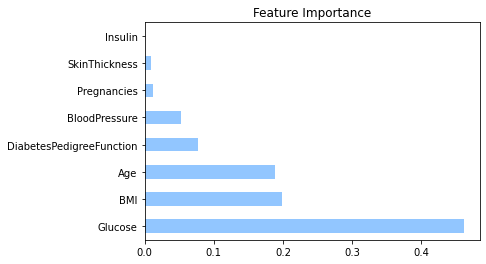

In [74]:
feat_importances = pd.Series(gb1.feature_importances_, index=features)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

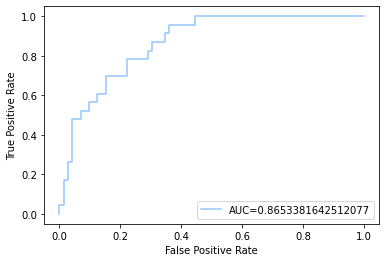

In [75]:
#define metrics
y_pred_proba = gb1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
model_acc.append(auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [76]:
skf = StratifiedKFold(n_splits=5, random_state=None) 
# skf.get_n_split(X,Y)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, Y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index] 
    gb1.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(gb1.score(X_test_fold, y_test_fold))

print('Overall Accuracy:',mean(lst_accu_stratified))
model_skf.append(mean(lst_accu_stratified))

# k_folds = KFold(n_splits = 10)

# scores = cross_val_score(lr, X, Y, cv = k_folds)

# print("Average CV Score: ", scores.mean())

Overall Accuracy: 0.7978947368421053


In [77]:
imp_features = gb1.feature_importances_
for i in imp_features:
    print(i.round(3))
df_imp_features = pd.DataFrame({"features":features}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False)

0.041
0.555
0.028
0.023
0.007
0.194
0.048
0.103


,features,weights
1,Glucose,0.555348
5,BMI,0.194326
7,Age,0.102854
6,DiabetesPedigreeFunction,0.048050
0,Pregnancies,0.041113
2,BloodPressure,0.027985
3,SkinThickness,0.022988
4,Insulin,0.007337


## EXtreme Gradient Boosting

In [78]:
# from xgboost import XGBClassifier

# # declare parameters
# params = {
#             'objective':'binary:logistic',
#             'max_depth': 6,
#             'alpha': 10,
#             'learning_rate': 1,
#             'n_estimators':100
#         }
                        
# # instantiate the classifier 
# xgb_clf = XGBClassifier(**params)

# # fit the classifier to the training data
# xgb_clf.fit(X_train, Y_train_res)

# # make predictions on test data
# y_pred = xgb_clf.predict(X_test)

# precision = precision_score(Y_test, y_pred)
# recall = recall_score(Y_test, y_pred)
# f1 = f1_score(Y_test, y_pred)

# print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
# print("Precision is", precision)
# print("Recall is", recall)
# print("F1 score is", f1)

In [79]:
# from sklearn.metrics import roc_curve,roc_auc_score

# t_fpr, t_tpr, _ = roc_curve(Y_test,y_pred)
# t_auc = roc_auc_score(Y_test,y_pred)
# model_acc.append(t_auc)
# plt.plot(t_fpr,t_tpr,label="data, auc="+str(t_auc))
# plt.legend(loc=4)
# plt.show()

In [80]:
# skf = StratifiedKFold(n_splits=5, random_state=None) 
# # skf.get_n_split(X,Y)
# lst_accu_stratified = []

# for train_index, test_index in skf.split(X, Y): 
#     X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
#     y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index] 
#     xgb_clf.fit(X_train_fold, y_train_fold) 
#     lst_accu_stratified.append(xgb_clf.score(X_test_fold, y_test_fold))

# print('Overall Accuracy:',mean(lst_accu_stratified))
# model_skf.append(mean(lst_accu_stratified))

# # k_folds = KFold(n_splits = 10)

# # scores = cross_val_score(lr, X, Y, cv = k_folds)

# # print("Average CV Score: ", scores.mean())

## Naive Bayes

In [81]:
# from sklearn.model_selection import RepeatedStratifiedKFold

# cv_method = RepeatedStratifiedKFold(n_splits=5, 
#                                     n_repeats=3, 
#                                     random_state=999)
# from sklearn.preprocessing import PowerTransformer
# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# gs_NB = GridSearchCV(estimator=model, 
#                      param_grid=params_NB, 
#                      cv=cv_method,
#                      verbose=1, 
#                      scoring='accuracy')


In [82]:
from sklearn.naive_bayes import GaussianNB

nvb = GaussianNB() # create a classifier
nvb.fit(X_train,Y_train_res) # fitting the data

print("Accuracy on training set: {:.3f}".format(nvb.score(X_train, Y_train_res)))
print("Accuracy on test set: {:.3f}".format(nvb.score(X_test, Y_test)))         

Accuracy on training set: 0.764
Accuracy on test set: 0.684


In [83]:
y_pred = nvb.predict(X_test)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)


print("Precision is", precision)
print("Recall is", recall)
print("F1 score is", f1)

Precision is 0.42857142857142855
Recall is 0.9130434782608695
F1 score is 0.5833333333333334


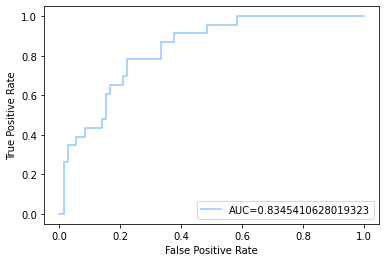

In [84]:
#define metrics
y_pred_proba = nvb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
model_acc.append(auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [85]:
skf = StratifiedKFold(n_splits=5, random_state=None) 
# skf.get_n_split(X,Y)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, Y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index] 
    nvb.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(nvb.score(X_test_fold, y_test_fold))

print('Overall Accuracy:',mean(lst_accu_stratified))
model_skf.append(mean(lst_accu_stratified))

# k_folds = KFold(n_splits = 10)

# scores = cross_val_score(lr, X, Y, cv = k_folds)

# print("Average CV Score: ", scores.mean())

Overall Accuracy: 0.7768421052631579


In [86]:
# model_acc = []
# models = [lr, model, dtree, rf, knn, gb, xgb_clf, nvb]
# for i in models:
#     i.fit(X_train,Y_train)
#     y_pred_proba = i.predict_proba(X_test)[::,1]
#     fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
#     auc = metrics.roc_auc_score(Y_test, y_pred_proba)
#     model_acc.append(auc)

models = [lr, SVM, dtree, rf, gb, nvb]                      
models = pd.DataFrame({'Models':models,'AUC':model_acc})

In [87]:
models = models.sort_values(by=['AUC'],ascending=False).reset_index().drop('index',axis=1)
best = models['Models'][0]
models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
models

,Models,AUC
0,LogisticRegression,0.871981
1,GradientBoostingClassifier,0.865338
2,GaussianNB,0.834541
3,SVC,0.810990
4,RandomForestClassifier,0.806461
5,DecisionTreeClassifier,0.773551


In [88]:
print('Hence the best model is',models['Models'][0],'with an area under curve of',round((models['AUC'][0]*100),2),'%')

Hence the best model is LogisticRegression with an area under curve of 87.2 %


In [89]:
models = [lr, SVM, dtree, rf, gb, nvb]                      
models1 = pd.DataFrame({'Models':models,'Stratified_K_Fold':model_skf})

models1 = models1.sort_values(by=['Stratified_K_Fold'],ascending=False).reset_index().drop('index',axis=1)
best = models1['Models'][0]
models1['Models']=models1['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
models1

,Models,Stratified_K_Fold
0,GradientBoostingClassifier,0.797895
1,RandomForestClassifier,0.783158
2,SVC,0.781053
3,GaussianNB,0.776842
4,LogisticRegression,0.772784
5,DecisionTreeClassifier,0.730718


In [90]:
print('Hence the best model is',models1['Models'][0],'with an Stratified K-Fold of',round((models1['Stratified_K_Fold'][0]*100),2),'%')

Hence the best model is GradientBoostingClassifier with an Stratified K-Fold of 79.79 %
